## Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [23]:
df = pd.read_csv('data-scaled-agg.csv', index_col='County')

In [24]:
df

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest
County,,,,,,,,,,,
51001,0.075854,0.148920,0.319901,0.435870,0.410805,0.412876,0.398849,0.223717,0.178736,0.296552,0.064338
51003,0.108095,0.182011,0.281478,0.361577,0.330150,0.398268,0.652957,0.669414,0.672845,0.580575,0.679813
51005,0.187226,0.147870,0.208440,0.382735,0.309672,0.361536,0.590581,0.651482,0.660489,0.531379,0.897165
51007,0.157467,0.144258,0.319836,0.347694,0.488828,0.370654,0.753323,0.808243,0.809483,0.716207,0.651586
51009,0.184217,0.145333,0.205452,0.416978,0.325681,0.367647,0.499006,0.525380,0.539368,0.463678,0.770831
...,...,...,...,...,...,...,...,...,...,...,...
51185,0.116529,0.144941,0.234319,0.346290,0.323538,0.330327,0.489482,0.442805,0.407040,0.404943,0.689147
51193,0.258949,0.131812,0.228013,0.338631,0.349740,0.407190,0.622397,0.713955,0.782040,0.648621,0.437404
51195,0.155507,0.156524,0.268670,0.338216,0.365901,0.380425,0.704343,0.766016,0.776580,0.659425,0.753340


In [25]:
#try diff # of clusters
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']])
    sse.append(km.inertia_)

C:\Users\daven\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daven\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daven\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\daven\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

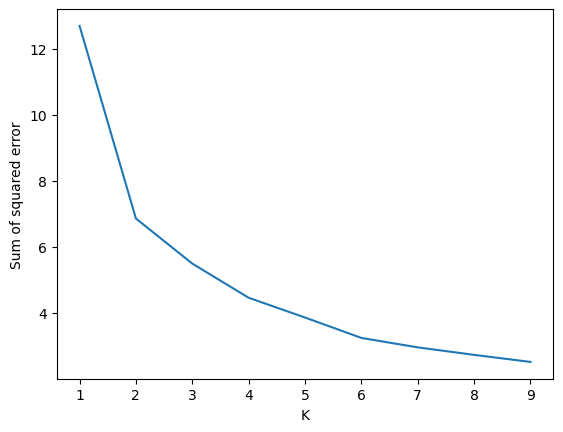

In [26]:
#look for elbow points
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [27]:
#create 6 clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')

In [28]:
#assign each county a cluster
y_hc = hc.fit_predict(df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']])
df['cluster'] = y_hc
df.sort_values("cluster", inplace = True, ascending=True)

#average input vars by cluster
df_cluster = df.groupby('cluster').mean()

C:\Users\daven\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [33]:
df_cluster

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest
cluster,,,,,,,,,,,
0,0.133383,0.128867,0.297380,0.392097,0.341883,0.362209,0.482646,0.436613,0.403200,0.400726,0.639814
1,0.502698,0.122869,0.174988,0.375223,0.303004,0.334988,0.492229,0.566486,0.612302,0.477270,0.724675
2,0.221829,0.149663,0.232138,0.386643,0.325803,0.380734,0.581783,0.623794,0.623487,0.524061,0.724302
3,0.125143,0.123845,0.322785,0.419901,0.348699,0.365582,0.391460,0.309270,0.267241,0.311678,0.167172
4,0.208644,0.149722,0.238781,0.357118,0.335440,0.385349,0.638863,0.707767,0.729640,0.603333,0.498675
5,0.221740,0.138939,0.293615,0.349280,0.407846,0.381528,0.713259,0.782529,0.812940,0.699504,0.637301


<Axes: ylabel='cluster'>

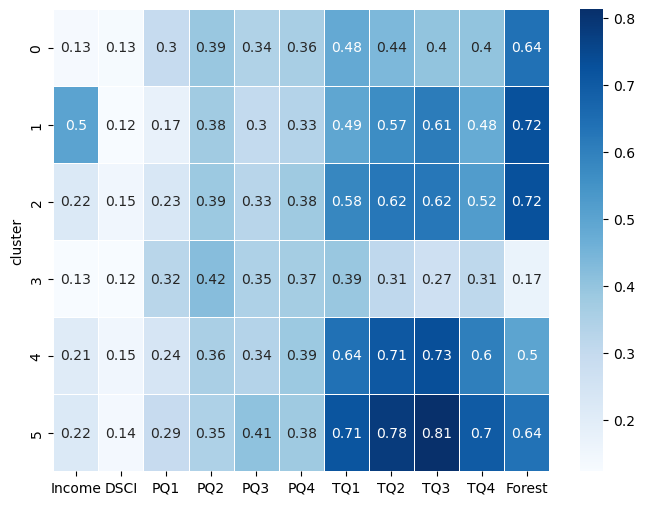

In [29]:
#heatmap of cluster characteristics
plt.figure(figsize=(8,6))
sns.heatmap(df_cluster, annot=True, cmap="Blues", linewidths=.5)

## Supervised Learning

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 6)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [38]:
#define input variables
input_var = df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]
X = input_var

y = df['cluster']

In [39]:
#train test split (replace with specific columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [41]:
#create rf model (w 100 trees)
rf = RandomForestClassifier(n_estimators=100)

#fit model with training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_test.index

Index([51153, 51179, 51125, 51181, 51079, 51195, 51095, 51159, 51115, 51161,
       51031, 51005, 51199, 51025, 51075, 51081, 51023, 51041, 51121, 51087,
       51175, 51197, 51127, 51103, 51017, 51009, 51107, 51069],
      dtype='int64', name='County')

In [50]:
#make predictions
y_pred = rf.predict(X_test)

for pred_label, true_label, index in zip(y_pred, y_test, y_test.index):
    print(pred_label, true_label, index)

4 4 51153
5 5 51179
2 2 51125
4 4 51181
5 5 51079
5 5 51195
4 4 51095
4 4 51159
3 3 51115
2 2 51161
2 2 51031
2 2 51005
4 4 51199
1 1 51025
2 2 51075
4 4 51081
0 0 51023
0 0 51041
5 5 51121
5 4 51087
4 4 51175
0 0 51197
5 5 51127
2 2 51103
5 2 51017
2 2 51009
0 3 51107
4 4 51069


In [51]:
from sklearn.metrics import classification_report

In [51]:
#assess model performance
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      0.88      0.93         8
           3       1.00      0.50      0.67         2
           4       1.00      0.89      0.94         9
           5       0.71      1.00      0.83         5

    accuracy                           0.89        28
   macro avg       0.91      0.88      0.87        28
weighted avg       0.92      0.89      0.89        28



In [52]:
#feature importance
feature_imp = pd.DataFrame(rf.feature_importances_,index= X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_imp)

        importance
Forest    0.164394
TQ3       0.151453
TQ4       0.120094
TQ2       0.111543
TQ1       0.099371
Income    0.095108
PQ1       0.092557
PQ3       0.058449
DSCI      0.046088
PQ2       0.031797
PQ4       0.029145
